Nota nos dados de treino (Decoreba): 97.75%
Nota nos dados de teste (Realidade): 79.33%


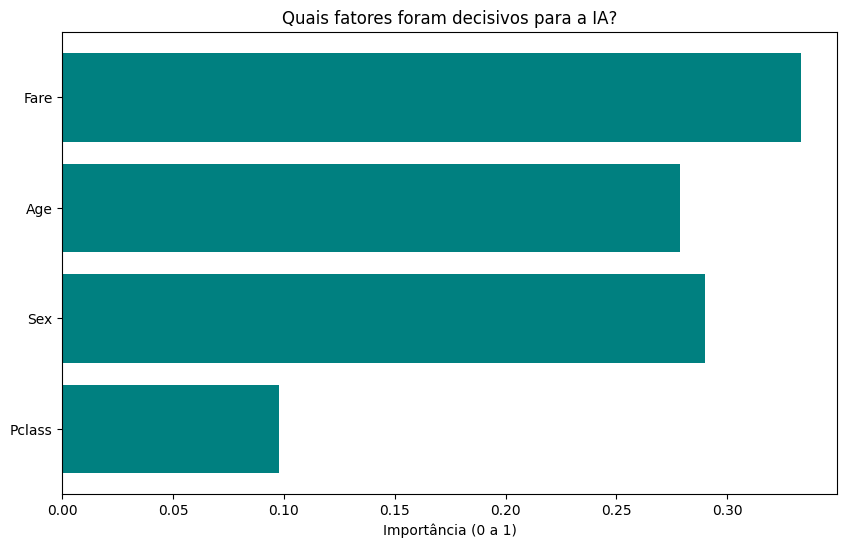

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1. Carregar e preparar os dados
df_titanic = pd.read_csv('Titanic-Dataset.csv')

# 2. Transformar Texto em Número (Obrigatório para a IA)
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})

# 3. Limpar buracos (Vimos que há 177 idades faltando na sua análise!)
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].median())

# 4. Selecionar APENAS colunas numéricas para o X
# Removemos 'Name', 'Ticket', 'Cabin' e 'Embarked' que são textos
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df_titanic[features]
y = df_titanic['Survived']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Dividindo os dados: 80% treino e 20% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Treinando a IA APENAS com os dados de treino
modelo_final = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_final.fit(X_treino, y_treino)

# 3. Fazendo a previsão com os dados de teste (que a IA nunca viu)
previsoes = modelo_final.predict(X_teste)

# 4. Calculando a nota REAL
nota_real = accuracy_score(y_teste, previsoes)

print(f"Nota nos dados de treino (Decoreba): {modelo_final.score(X_treino, y_treino)*100:.2f}%")
print(f"Nota nos dados de teste (Realidade): {nota_real*100:.2f}%")

import matplotlib.pyplot as plt
import numpy as np

# 1. Pegando a importância de cada coluna
importancias = modelo_final.feature_importances_
colunas = X.columns

# 2. Criando o gráfico para visualização
plt.figure(figsize=(10, 6))
plt.barh(colunas, importancias, color='teal')
plt.xlabel("Importância (0 a 1)")
plt.title("Quais fatores foram decisivos para a IA?")
plt.show()